In [3]:
import numpy as np
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import load_model,Model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import os
from sklearn.metrics import classification_report, confusion_matrix

# Load pre-trained model
model = load_model('newVGG.h5')
conv_layer_output = model.get_layer('global_max_pooling2d').output
feature_extraction_model = Model(inputs=model.input, outputs=conv_layer_output)
def extract_features(model, img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Assuming input size of the model is 224x224
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    features = model.predict(img_array)
    return features.flatten()
data_dir = './tumor_dataset/dataset'
classes = os.listdir(data_dir)

# Extract features for all images in the dataset
X = []
y = []
for class_name in classes:
    class_dir = os.path.join(data_dir, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        features = extract_features(feature_extraction_model, img_path)
        X.append(features)
        y.append(class_name)

X = np.array(X)
y = np.array(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#for linear kernel

Accuracy: 0.97


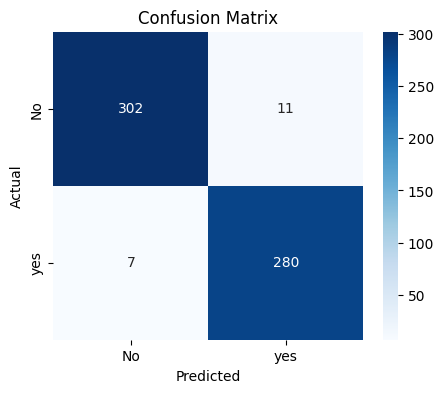

In [23]:
# Train SVC classifier
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

# Predict on test set
y_pred = svc.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=classes)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [24]:
print(classification_report(y_test, y_pred, labels=classes))

              precision    recall  f1-score   support

          No       0.98      0.96      0.97       313
         yes       0.96      0.98      0.97       287

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600



In [32]:
#for rbf kernel

Accuracy: 0.9716666666666667


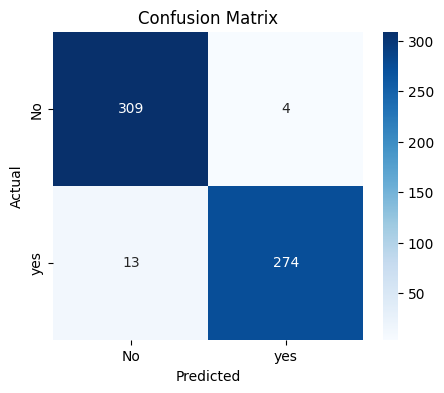

In [33]:
# Train SVC classifier
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)

# Predict on test set
y_pred = svc.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=classes)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [34]:
print(classification_report(y_test, y_pred, labels=classes))

              precision    recall  f1-score   support

          No       0.96      0.99      0.97       313
         yes       0.99      0.95      0.97       287

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600



In [25]:
#for Poly kernel

Accuracy: 0.9766666666666667


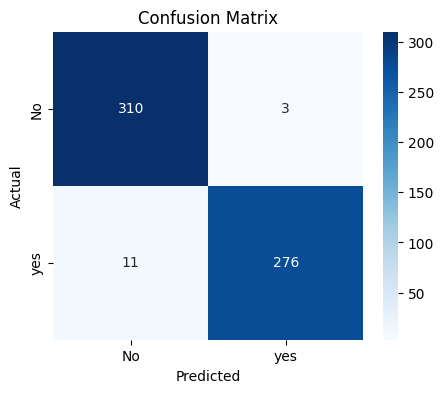

In [29]:
# Train SVC classifier
svc = SVC(kernel='poly')
svc.fit(X_train, y_train)

# Predict on test set
y_pred = svc.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=classes)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [30]:
print(classification_report(y_test, y_pred, labels=classes))

              precision    recall  f1-score   support

          No       0.97      0.99      0.98       313
         yes       0.99      0.96      0.98       287

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600



In [19]:
svc.predict(X[-1].reshape(1, -1))


array(['yes'], dtype='<U3')

In [20]:
y[-1]

'yes'

In [18]:
y

array(['No', 'No', 'No', ..., 'yes', 'yes', 'yes'], dtype='<U3')

In [31]:
import joblib
joblib.dump(svc, 'svm_vgg.pkl')

['svm_vgg.pkl']